### Basit bir Graph Oluşturma

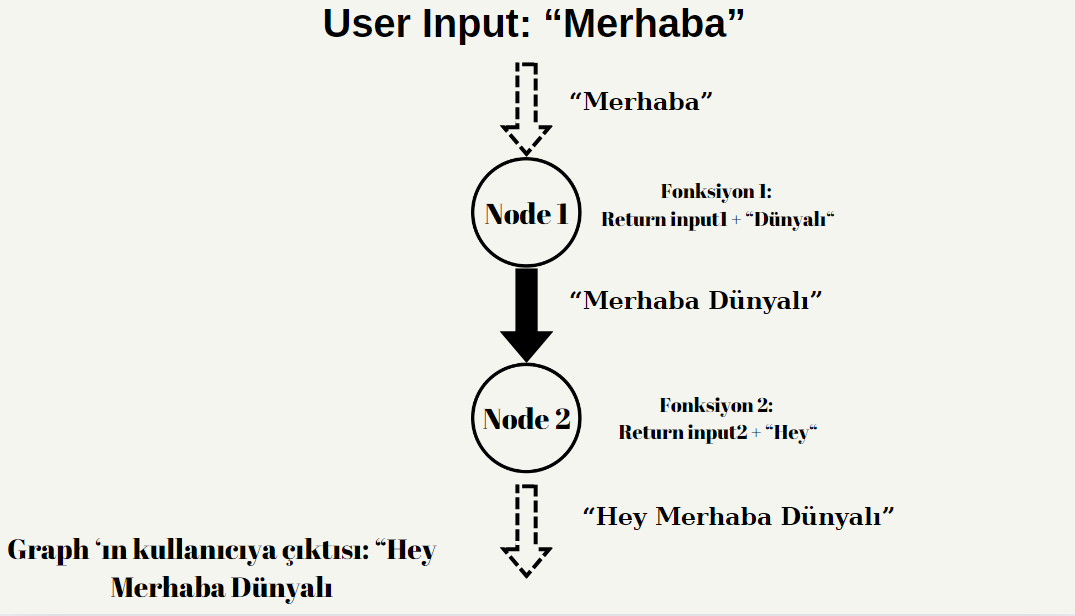

In [ ]:
!pip install langgraph


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.6/85.6 kB 2.0 MB/s eta 0:00:00


In [ ]:
def function_1(input_1):
    return input_1 + " Merhaba "

def function_2(input_2):
    return input_2 + "Dunyali"

In [ ]:
from langgraph.graph import Graph

# Define a Langchain graph
workflow = Graph()

workflow.add_node("node_1", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('node_1', 'node_2')

workflow.set_entry_point("node_1")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [ ]:
app.invoke("Hey")


'Hey Merhaba Dunyali'

In [ ]:
input = 'Hey'
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'node_1':
---
Hey Merhaba 

---

Output from node 'node_2':
---
Hey Merhaba Dunyali

---



## LLM Çağrısı ile Graph Oluşturma

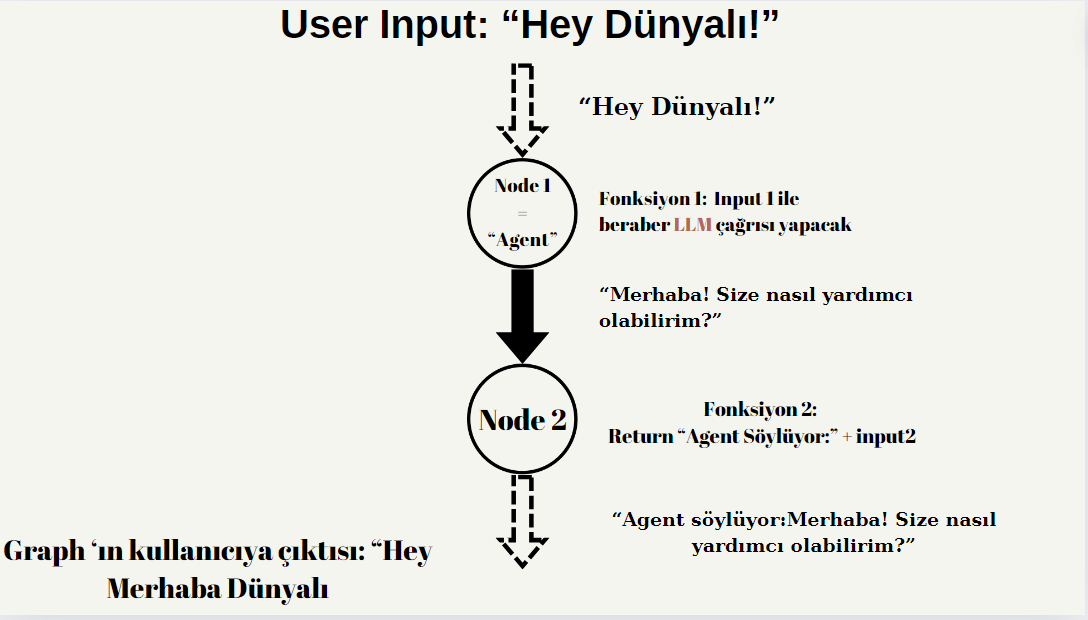

In [ ]:
!pip install python-dotenv

In [ ]:
!pip install langchain langchain_openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 974.2/974.2 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.5/315.5 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.0/145.0 kB 18.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


In [118]:
from dotenv import load_dotenv
import os

#Load environment variables from .env file
load_dotenv()

# you can access open api key
os.environ['AZURE_OPENAI_API_KEY'] = os.environ.get("AZURE_OPENAI_API_KEY")

In [119]:
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
llm = AzureChatOpenAI(
    deployment_name="reidin-ner",
    temperature=0.1,
    verbose=True,
    streaming=True,
)

In [ ]:
# Modeli kullanarak çağrı yapılması
response = llm.invoke('Hey dünyalı')
print(response)

content='Merhaba! Size nasıl yardımcı olabilirim?' response_metadata={'finish_reason': 'stop'} id='run-298ad55e-98d6-446e-b8a2-217c5fc9423e-0'


In [ ]:
def function_1(input_1):
    response = llm.invoke(input_1)
    return response.content

def function_2(input_2):
    return "Agent söylüyor:" + input_2

In [ ]:
from langgraph.graph import Graph

#Define a Langchain Graph
workflow = Graph()

workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('agent', 'node_2')
workflow.set_entry_point("agent")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [ ]:
response = app.invoke("Hey Dünyalı!")
print(response)  # "Agent söylüyor:Merhaba! Size nasıl yardımcı olabilirim?"

Agent söylüyor:Merhaba! Size nasıl yardımcı olabilirim?


In [ ]:
input = "Hey Dünyalı!"

for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

# Son düğümün çıktısını ayrıca kontrol et
final_output = app.invoke(input)
print("Final Output:")
print(final_output)

Output from node 'agent':
---
Merhaba! Size nasıl yardımcı olabilirim?

---

Output from node 'node_2':
---
Agent söylüyor:Merhaba! Size nasıl yardımcı olabilirim?

---

Final Output:
Agent söylüyor:Merhaba! Size nasıl yardımcı olabilirim?


### Daha Karmaşık Bir Graph ile Çalışalım!

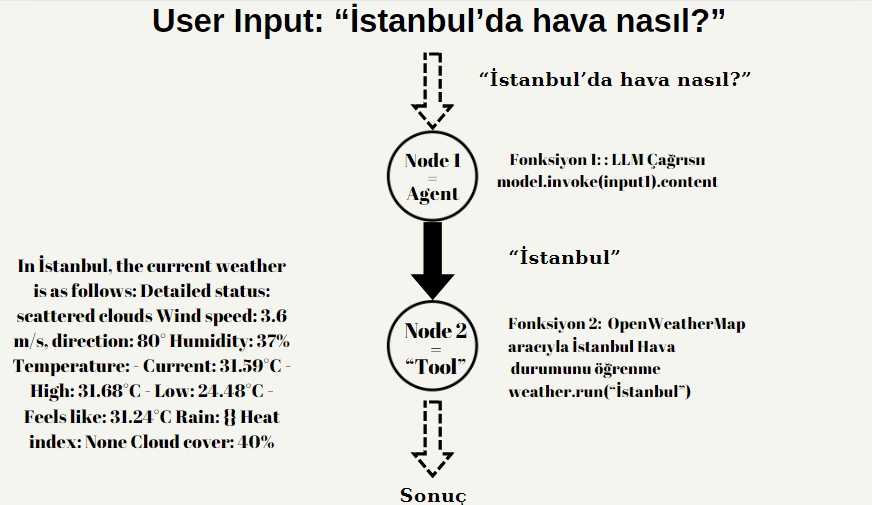

In [ ]:
from dotenv import load_dotenv
import os

#Load environment variables from .env file
load_dotenv()

# you can access open api key
os.environ['AZURE_OPENAI_API_KEY'] = os.environ.get("AZURE_OPENAI_API_KEY")

In [ ]:
from langchain_openai import AzureChatOpenAI, AzureOpenAIEmbeddings
llm = AzureChatOpenAI(
    deployment_name="reidin-ner",
    temperature=0.1,
    verbose=True,
    streaming=True,
)

In [ ]:
def function_1(input_1):
    complete_query = "Verilen cümledeki şehir ismini bul ve bana ver. Hava durumunu sormuyorum. Sadece şehir ismini bana ver. Cümle:" + input_1
    response = llm.invoke(complete_query)
    return response.content

def function_2(input_2):
    return "Agent söylüyor:" + input_2

In [ ]:
from langgraph.graph import Graph

#Define a Langchain Graph
workflow = Graph()

workflow.add_node("agent", function_1)
workflow.add_node("node_2", function_2)

workflow.add_edge('agent', 'node_2')
workflow.set_entry_point("agent")
workflow.set_finish_point("node_2")

app = workflow.compile()

In [ ]:
# Modeli kullanarak çağrı yapılması
response = app.invoke("İstanbul'da hava nasıl?")
print(response)

Agent söylüyor:İstanbul


In [ ]:
!pip install pyowm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 9.4 MB/s eta 0:00:00


In [ ]:
!pip install langchain_community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.2/49.2 kB 7.0 MB/s eta 0:00:00


In [94]:
#Load environment variables from .env file
import os
load_dotenv()
print(os.environ.get("OPENWEATHER_API_KEY"))


812ce3196e884fb9100aa228e6d19292


In [113]:
import os
from langchain_community.utilities import OpenWeatherMapAPIWrapper
os.environ["OPENWEATHERMAP_API_KEY"] = "81f75ff96b55ec4a317b4d8c5cc22d25"
weather = OpenWeatherMapAPIWrapper()

In [98]:
weather_data = weather.run("İstanbul")
print(weather_data)

In İstanbul, the current weather is as follows:
Detailed status: scattered clouds
Wind speed: 3.6 m/s, direction: 80°
Humidity: 37%
Temperature: 
  - Current: 31.59°C
  - High: 31.68°C
  - Low: 24.48°C
  - Feels like: 31.24°C
Rain: {}
Heat index: None
Cloud cover: 40%


In [99]:
def function_1(input_1):
    complete_query = "Verilen cümledeki şehir ismini bul ve bana ver. Hava durumunu sormuyorum. Sadece şehir ismini bana ver. Cümle:" + input_1
    response = llm.invoke(complete_query)
    return response.content

def function_2(input_2):
    weather_data = weather.run(input_2)
    return weather_data

In [127]:
from langgraph.graph import Graph

workflow = Graph()

#calling node 1 as agent
workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)

workflow.add_edge('agent', 'tool')

workflow.set_entry_point("agent")
workflow.set_finish_point("tool")

app = workflow.compile()

In [101]:
# Modeli kullanarak çağrı yapılması
response = app.invoke("İstanbul'da hava nasıl?")
print(response)

In İstanbul, the current weather is as follows:
Detailed status: scattered clouds
Wind speed: 3.6 m/s, direction: 80°
Humidity: 37%
Temperature: 
  - Current: 31.59°C
  - High: 31.68°C
  - Low: 24.48°C
  - Feels like: 31.24°C
Rain: {}
Heat index: None
Cloud cover: 40%


In [103]:
input = "İstanbul'da hava nasıl?"
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")
# Son düğümün çıktısını ayrıca kontrol et
final_output = app.invoke(input)
print("Final Output:")
print(final_output)

Output from node 'agent':
---
İstanbul

---

Output from node 'tool':
---
In İstanbul, the current weather is as follows:
Detailed status: scattered clouds
Wind speed: 3.6 m/s, direction: 80°
Humidity: 37%
Temperature: 
  - Current: 31.59°C
  - High: 31.68°C
  - Low: 24.48°C
  - Feels like: 31.24°C
Rain: {}
Heat index: None
Cloud cover: 40%

---

Final Output:
In İstanbul, the current weather is as follows:
Detailed status: scattered clouds
Wind speed: 3.6 m/s, direction: 80°
Humidity: 37%
Temperature: 
  - Current: 31.59°C
  - High: 31.68°C
  - Low: 24.48°C
  - Feels like: 31.24°C
Rain: {}
Heat index: None
Cloud cover: 40%


Ya sadece sıcaklığı istiyorsak? Ancak mevcut kurulum bize tam hava durumu raporunu veriyor. Verileri filtrelemek için başka bir LLM çağrısı yapabiliriz


In [106]:
def function_3(input_3):
  complete_query = "Göreviniz, kullanıcı sorgusuna göre kısa ve öz\
  bir şekilde bilgi sağlamaktır. Kullanıcı sorgusu aşağıdadır:" + "user input"
  response = model.invoke(complete_query)
  return response.content

In [105]:
# assign AgentState as an empty dict
AgentState = {}

# messages key will be assigned as an empty array. We will append new messages as we pass along nodes.
AgentState["messages"] = []

In [107]:
AgentState


{'messages': []}

Amacımız bu durumun şu şekilde doldurulmasını sağlamaktır: {'messages': [HumanMessage, AIMessage, ...]]} Ayrıca şimdi yeni AgentState boyunca bilgi iletmek için işlevlerimizi değiştirmemiz gerekiyor.


In [128]:
def function_1(state):
    messages = state['messages']
    user_input = messages[-1]
    complete_query = "Verilen cümledeki şehir ismini bul ve bana ver. Hava durumunu sormuyorum. Sadece şehir ismini bana ver. Cümle:" + user_input
    response = llm.invoke(complete_query)
    state['messages'].append(response.content) # appending AIMessage response to the AgentState
    return state

def function_2(state):
    messages = state['messages']
    agent_response = messages[-1]
    weather = OpenWeatherMapAPIWrapper()
    weather_data = weather.run(agent_response)
    state['messages'].append(weather_data)
    return state

def function_3(state):
    messages = state['messages']
    user_input = messages[0]
    available_info = messages[-1]
    agent2_query = "Göreviniz, kullanıcı sorgusuna ve internetteki mevcut bilgilere dayanarak bilgileri kısa ve öz bir şekilde sağlamaktır. \
                       Kullanıcı sorgusu aşağıdadır: " + user_input + " Mevcut bilgiler: " + available_info
    response = llm.invoke(agent2_query)
    return response.content

In [129]:
from langgraph.graph import Graph

workflow = Graph()


workflow.add_node("agent", function_1)
workflow.add_node("tool", function_2)
workflow.add_node("responder", function_3)

workflow.add_edge('agent', 'tool')
workflow.add_edge('tool', 'responder')

workflow.set_entry_point("agent")
workflow.set_finish_point("responder")

app = workflow.compile()

In [136]:
import os
from langchain_community.utilities import OpenWeatherMapAPIWrapper
os.environ["OPENWEATHERMAP_API_KEY"] = "812ce3196e884fb9100aa228e6d19292"
weather = OpenWeatherMapAPIWrapper()

print(os.environ["OPENWEATHERMAP_API_KEY"])

812ce3196e884fb9100aa228e6d19292


In [140]:
inputs = {"messages": ["İstanbul'da hava nasıl?"]}
app.invoke(inputs)

"İstanbul'da hava şu anda açık gökyüzüyle birlikte 27.68°C sıcaklıkta ve 10.8 m/s hızında esen 10°'lik bir rüzgarla devam ediyor. Nem oranı ise %65."

In [138]:
inputs = {"messages": ["İstanbul'da hava nasıl?"]}
app.invoke(inputs)

"İstanbul'da hava şu anda açık gökyüzüne sahip. Rüzgar hızı 10.8 m/s ve yönü 10°. Nem oranı ise %65. Sıcaklık ise şu şekilde:\n- Şu anki sıcaklık: 27.68°C\n- En yüksek sıcaklık: 29.09°C\n- En düşük sıcaklık: 27.68°C\n- Hissedilen sıcaklık: 29.5°C\nYağmur: Yok\nIsı hissi: Yok\nBulut örtüsü: %0"

In [141]:
input = {"messages": ["İstanbul'da hava nasıl?"]}
for output in app.stream(input):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'agent':
---
{'messages': ["İstanbul'da hava nasıl?", 'İstanbul']}

---

Output from node 'tool':
---
{'messages': ["İstanbul'da hava nasıl?", 'İstanbul', 'In İstanbul, the current weather is as follows:\nDetailed status: clear sky\nWind speed: 10.8 m/s, direction: 10°\nHumidity: 65%\nTemperature: \n  - Current: 27.68°C\n  - High: 29.09°C\n  - Low: 27.68°C\n  - Feels like: 29.5°C\nRain: {}\nHeat index: None\nCloud cover: 0%']}

---

Output from node 'responder':
---
İstanbul'da hava şu anda açık gökyüzüne sahip. Rüzgar hızı 10.8 m/s ve yönü 10°. Nem oranı ise %65. Sıcaklık ise şu şekildedir:
- Şu anki sıcaklık: 27.68°C
- En yüksek sıcaklık: 29.09°C
- En düşük sıcaklık: 27.68°C
- Hissedilen sıcaklık: 29.5°C
Yağış: Yok
Isı hissi: Yok
Bulut örtüsü: %0

---



In [143]:
inputs = {"messages": ["nasılsın?"]}
app.invoke(inputs)

NotFoundError: Unable to find the resource

# Örnek Akış

In [175]:
# AgentState sözlüğü
AgentState = {}
AgentState["messages"] = []

In [202]:
# function_1: Kullanıcıya hangi model ile test sürüşü yapmak istediğini sormak
def function_1(state):
    question = "Hangi model ile test sürüşü yapmak istiyorsunuz? (Golf, Passat, T-roc)"
    state['messages'].append(question)
    return state

# function_2: Kullanıcı yanıtını almak (model)
def function_2(state):
    user_input = "T-roc"  # Örnek olarak Golf modelini seçelim
    state['messages'].append(user_input)
    return state

# function_3: Kullanıcıya telefon numarasını sormak
def function_3(state):
    question = "Telefon numaranızı giriniz:"
    state['messages'].append(question)
    return state

# function_4: Kullanıcı yanıtını almak (telefon numarası)
def function_4(state):
    user_input = "555-1234"  # Örnek olarak telefon numarası girelim
    state['messages'].append(user_input)
    return state

# function_5: Kullanıcıya şehir bilgisi sormak
def function_5(state):
    question = "Hangi şehirde test sürüşü yapmak istiyorsunuz?"
    state['messages'].append(question)
    return state

# function_6: Kullanıcı yanıtını almak (şehir)
def function_6(state):
    user_input = "Istanbul"  # Örnek olarak Istanbul'u seçelim
    state['messages'].append(user_input)
    return state

# function_7: Kullanıcı yanıtını işlemek ve Azure OpenAI'den model hakkında bilgi almak
def function_7(state):
    messages = state['messages']
    model = messages[1]  # Kullanıcının seçtiği model
    phone_number = messages[3]  # Kullanıcının girdiği telefon numarası
    city = messages[5]  # Kullanıcının girdiği şehir

    detailed_info = llm.invoke(messages)
    final_response = f"{detailed_info.content}"
    return final_response


In [203]:
# İş akışını tanımlayın
workflow = Graph()

workflow.add_node("ask_model", function_1)
workflow.add_node("get_model_input", function_2)
workflow.add_node("ask_phone_number", function_3)
workflow.add_node("get_phone_number_input", function_4)
workflow.add_node("ask_city", function_5)
workflow.add_node("get_city_input", function_6)
workflow.add_node("provide_details", function_7)

workflow.add_edge('ask_model', 'get_model_input')
workflow.add_edge('get_model_input', 'ask_phone_number')
workflow.add_edge('ask_phone_number', 'get_phone_number_input')
workflow.add_edge('get_phone_number_input', 'ask_city')
workflow.add_edge('ask_city', 'get_city_input')
workflow.add_edge('get_city_input', 'provide_details')

workflow.set_entry_point("ask_model")
workflow.set_finish_point("provide_details")

app = workflow.compile()

In [204]:
# Kullanıcıdan gelen ilk yanıtı simüle edin
AgentState["messages"].append("T-roc")  # Kullanıcının cevabı, normalde kullanıcıdan dinamik olarak alınır

# İş akışını çalıştırın
response = app.invoke(AgentState)
print(response)

Anladım, İstanbul'da T-roc modeli ile test sürüşü yapmak istiyorsunuz. Size en yakın Volkswagen bayisine yönlendirebilirim. İletişim bilgilerinizi alabilir miyim?
